# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

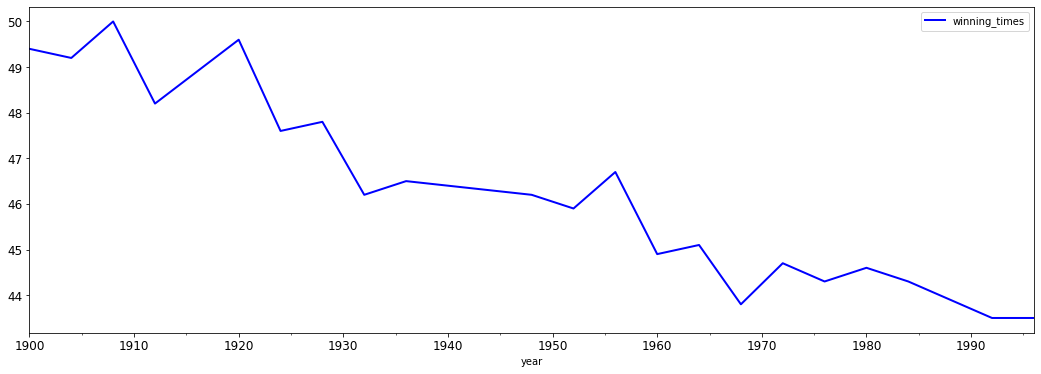

In [6]:
# Plot the time series
data.plot(figsize = (18,6),color = 'blue', linewidth = 2, fontsize = 12);

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [7]:
# Difference the time series
data_diff = data.diff(periods = 1)
data_diff.dropna(inplace = True)
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

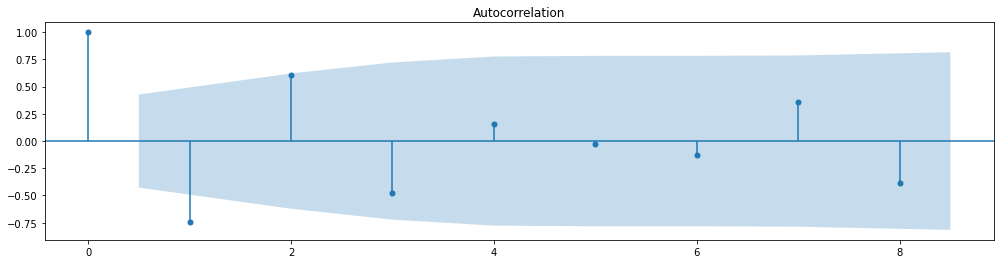

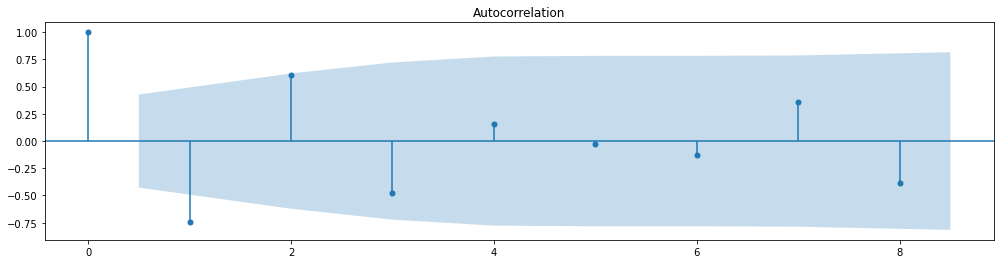

In [16]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax= plt.subplots(figsize = (17,4))
plot_acf(data_diff, ax = ax, lags = 8)

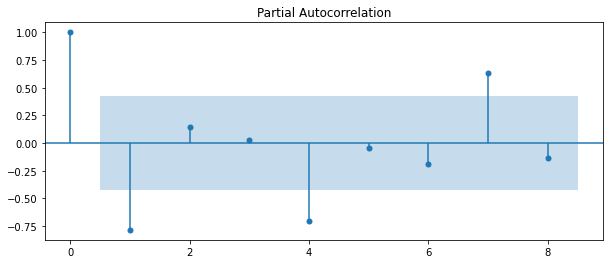

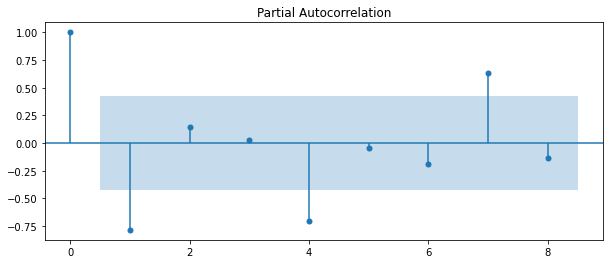

In [15]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize = (10,4))
plot_pacf(data_diff, ax = ax, lags = 8)



Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [30]:
#Importing the necessadry packages
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Instantiate an AR(1,0) model to the simulated data
model = ARIMA(data_diff, order = (1,0,0))

In [31]:
#Fit the model to data
mod_fit = model.fit()

In [19]:
#Print the summary
print(mod_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Wed, 24 Aug 2022   AIC                             46.107
Time:                        18:44:08   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

In [23]:
print(mod_fit.params)

const                 -0.288457
ar.L1.winning_times   -0.718619
dtype: float64


In [37]:
import warnings
warnings.filterwarnings("ignore")
#Instantiate an AR(1,1) model
model = ARIMA(data_diff, order = (1,0,1))
mod_fit = model.fit()

In [39]:
print(mod_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Wed, 24 Aug 2022   AIC                             47.916
Time:                        18:55:45   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.001      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_ti

In [26]:
print(mod_fit.params)

const                 -0.285012
ar.L1.winning_times   -0.770752
ma.L1.winning_times    0.117226
dtype: float64


In [40]:
import warnings
warnings.filterwarnings("ignore")
#Instantiate an AR(2,1) model
model = ARIMA(data_diff, order = (2,0,1))
mod_fit = model.fit()
print(mod_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Wed, 24 Aug 2022   AIC                             47.911
Time:                        18:55:53   BIC                             53.133
Sample:                    12-31-1904   HQIC                            49.044
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.000      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_ti

In [34]:
print(mod_fit.params)

const                 -0.291558
ar.L1.winning_times   -1.682692
ar.L2.winning_times   -0.771405
ma.L1.winning_times    0.999923
dtype: float64


## What is your final model? Why did you pick this model?

In [41]:
# Your comments here

"""
ARMA(1,0) is the choice I will pick as it only has one variable as compared to the rest

"""

'\nARMA(1,0) is the choice I will pick\n\n'

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 